# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import copy
import pyranges as pr
import pandas as pd
import numpy as np
import scipy.stats
import pyreadr
import pyBigWig
import swifter
import seaborn as sns
import torch
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, f1_score
import matplotlib.pyplot as plt
import matplotlib
from statannotations.Annotator import Annotator
from glob import glob

In [2]:
# importing the sys module
import sys        
import os
 
project_dir = os.getcwd()[:-len("notebooks")]
sys.path.insert(0, '..')

In [3]:
project_dir

'/home/lukas/Projects/ML4RG-2023-project/'

In [4]:

from helpers.plots import MotifMetrics, LoadedMotifMetrics, MetricsHandler

from helpers.motifs import motifs

In [5]:
# paths
data_dir = project_dir + "_sdafasdfdata/"
# hackish way to use the data dir on my local machine (Lukas)
if not os.path.exists(data_dir):
    data_dir = os.path.abspath("../../test/")
results_dir = data_dir + "results/"
if not os.path.exists(results_dir):
    results_dir = os.path.join(project_dir,"results")

print("Data dir: ", data_dir)
print("Results dir: ", results_dir)


Data dir:  /home/lukas/Projects/test
Results dir:  /home/lukas/Projects/ML4RG-2023-project/results


# Aesthetics

In [6]:
#sns.set_theme(context="poster")
sns.set_theme()
#sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("talk", font_scale=1.7)#, rc={"font.size": 7})
#
#sns.set_context("poster", 
sns.set_style(style={'xtick.bottom': True,'ytick.left': True, 'axes.edgecolor': 'black'})
#sns.set_style("ticks")

# Evaluation in S. cerevisiae (Fig2)

In [7]:
# define paths and names of models to evaluate
model_paths = os.listdir(results_dir)
# remove the Random folder if it exists
if "random" in model_paths:
    model_paths.remove("random")
    model_paths.remove("entropy")
    model_paths.remove("dinuc_test")


# work around as plots.py doesn't use os.path.join to join paths...
model_names = list(map(lambda x: os.path.basename(x), model_paths))
model_map = {"dinuc": "Dinucleotide distribution",
             "11mer": "11-mer",
             "species_aware": "Species-aware",
             "species_unaware": "Species-unaware",
             }

model_names = list(map(lambda x: model_map[x], model_names))
model_paths = list(map(lambda x: os.path.join(results_dir, x) + "/", model_paths))
print(model_paths)
print(model_names)

# test_set 
test_path = glob(os.path.join(data_dir ,"*.fa"))[0]
print(test_path)


['/home/lukas/Projects/ML4RG-2023-project/results/dinuc/', '/home/lukas/Projects/ML4RG-2023-project/results/species_aware/', '/home/lukas/Projects/ML4RG-2023-project/results/species_unaware/', '/home/lukas/Projects/ML4RG-2023-project/results/11mer/']
['Dinucleotide distribution', 'Species-aware', 'Species-unaware', '11-mer']
/home/lukas/Projects/test/Homo_sapiens_3prime_UTR.fa


In [8]:
print(model_paths)
scer_mh = MetricsHandler(model_paths, model_names, test_path, 
                         motifs=motifs, seq_col="3UTR",
                         existing_probas=[True, False, False, True],
                         n_random_kmers=6950)

['/home/lukas/Projects/ML4RG-2023-project/results/dinuc/', '/home/lukas/Projects/ML4RG-2023-project/results/species_aware/', '/home/lukas/Projects/ML4RG-2023-project/results/species_unaware/', '/home/lukas/Projects/ML4RG-2023-project/results/11mer/']
Adding models to df
Dinucleotide distribution
3036871
Species-aware
3036871
Species-unaware
3036871
11-mer
3036871
Searching for motifs
True
EWSR1 GGGGG
EWSR1 GGGGG
True
FUS GGGGG
FUS GGGGG
True
TAF15 GGGGG
TAF15 GGGGG
True
HNRNPL ACACA
HNRNPL ACACA
True
PABPN1L AAAAA
PABPN1L AAAAA
True
TRA2A GAAGA
TRA2A GAAGA
True
PCBP2 CCCCC
PCBP2 CCCCC
True
RBFOX2 GCATG
RBFOX2 GCATG
True
TARDBP GTATG
TARDBP GTATG
True
HNRNPC TTTTT
HNRNPC TTTTT
True
TIA1 TTTTT
TIA1 TTTTT
True
PTBP3 TTTCT
PTBP3 TTTCT
True
CELF1 TATGT
CELF1 TATGT
True
FUBP3 TATAT
FUBP3 TATAT
True
KHSRP TGTAT
KHSRP TGTAT
True
PUM1 TGTAT
PUM1 TGTAT
True
KHDRBS2 ATAAA
KHDRBS2 ATAAA
96593
Get non-motif kmer instances
found 0 random kmers
found 1000 random kmers
found 2000 random kmers
found 30

In [14]:
scer_mh

In [15]:
# motif renaming
def motif_correction(m_name):
    return m_name +"\n"+ motifs.name_seq_dict[m_name].replace("T","U")
def fix(x):
    if x=="non_motif":
        return "non-motif"
    else:
        return motif_correction(x)

In [21]:


# adding gpar positions here

cols = ["motif_range","motif","model","avg_target_probas"]
keep_models = ["Dinucleotide distribution","11-mer", "Species-aware", "Species-unaware"]
#keep_models = ["11-mer"]

scer_df_gpar = scer_mh.motif_df_l[scer_mh.motif_df_l["model"].isin(keep_models)]

#scer_test_path_gpar = data_dir + "gpar_clip_jun.csv"

#scer_mh_gpar = MetricsHandler(model_paths, _names, scer_test_path_gpar, motifs=motifs, seq_col="UTR3_seq",
                         #binding_site_col="gpar_binding", random_kmer_len=7, n_random_kmers=6290, existing_probas=[False, False,True, False,False,])

#gpar_plot_df = scer_mh_gpar.motif_df_l
#gpar_plot_df = gpar_plot_df[gpar_plot_df.motif.isin(["non_motif","gpar_binding"])]
#gpar_plot_df = gpar_plot_df[gpar_plot_df.target_probas.apply(lambda x: len(x)>0)]

#gpar_plot_df = gpar_plot_df.query("motif=='gpar_binding' and model in @keep_models")
gpar_plot_df = scer_df_gpar.loc[scer_df_gpar['motif_range'].apply(lambda x: x[1] - x[0] > 20 and x[1] - x[0] < 30)]

plot_df = scer_df_gpar.query("model in @keep_models")[cols]
plot_df = plot_df.rename(columns={"model":"Model"})


In [ ]:
# conservation score


In [27]:
# get only motif KHDRBS2 with model 11-mer and print it
print(len(plot_df.query("motif=='KHDRBS2' and Model=='11-mer'")))

# get only motif KHDRBS2 with model Species_aware and print it
print(plot_df.query("motif=='KHDRBS2' and Model=='Species-aware'"))



8210
               motif_range    motif          Model  avg_target_probas
185962          (895, 900)  KHDRBS2  Species-aware           0.341310
185963        (1586, 1591)  KHDRBS2  Species-aware           0.358624
185964        (2230, 2235)  KHDRBS2  Species-aware           0.359893
185965        (3063, 3068)  KHDRBS2  Species-aware           0.313783
185966        (4378, 4383)  KHDRBS2  Species-aware           0.369874
...                    ...      ...            ...                ...
194167  (3035729, 3035734)  KHDRBS2  Species-aware           0.247922
194168  (3035807, 3035812)  KHDRBS2  Species-aware           0.300592
194169  (3036473, 3036478)  KHDRBS2  Species-aware           0.422818
194170  (3036554, 3036559)  KHDRBS2  Species-aware           0.351423
194171  (3036653, 3036658)  KHDRBS2  Species-aware           0.339119

[8210 rows x 4 columns]


('RBFOX2', 'Species-aware')
----------------
('RBFOX2', 'Species-unaware')
('TARDBP', 'Species-aware')
----------------
('TARDBP', 'Species-unaware')
('HNRNPC', 'Species-aware')
----------------
('HNRNPC', 'Species-unaware')
('TIA1', 'Species-aware')
----------------
('TIA1', 'Species-unaware')
('PTBP3', 'Species-aware')
----------------
('PTBP3', 'Species-unaware')
('CELF1', 'Species-aware')
----------------
('CELF1', 'Species-unaware')
('FUBP3', 'Species-aware')
----------------
('FUBP3', 'Species-unaware')
('KHSRP', 'Species-aware')
----------------
('KHSRP', 'Species-unaware')
('PUM1', 'Species-aware')
----------------
('PUM1', 'Species-unaware')
('KHDRBS2', 'Species-aware')
----------------
('KHDRBS2', 'Species-unaware')
('PABPN1L', 'Species-unaware')
----------------
('PABPN1L', '11-mer')
('TRA2A', 'Species-unaware')
----------------
('TRA2A', '11-mer')
('PCBP2', 'Species-aware')
----------------
('PCBP2', 'Species-unaware')
('HNRNPL', 'Species-unaware')
----------------
('HNRNPL

<Figure size 640x480 with 0 Axes>

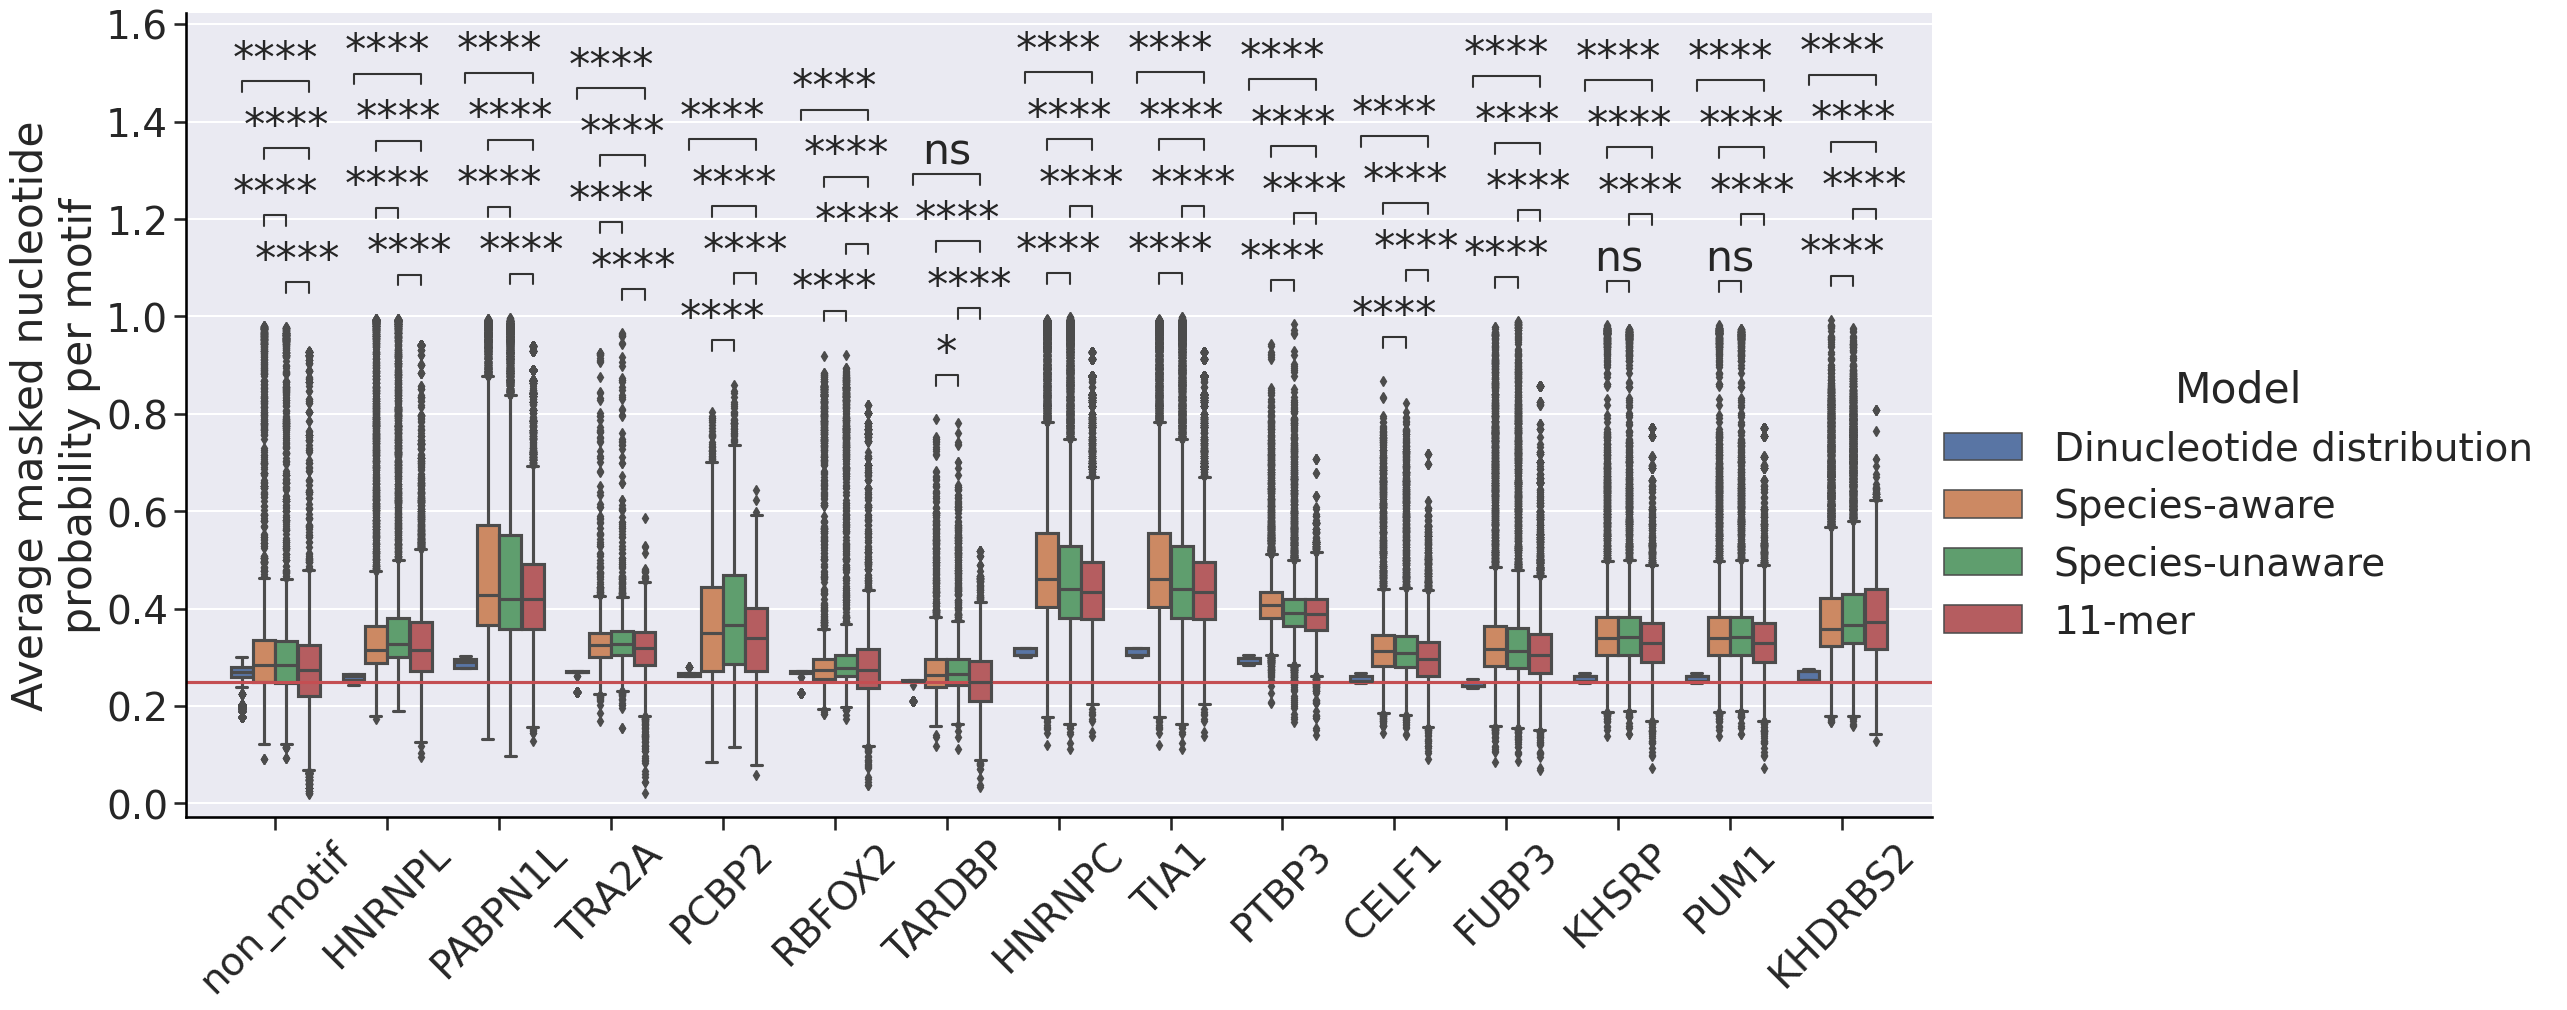

In [23]:
# plot
plt.clf()
plot_significance = False

order = list(plot_df["motif"].unique())
labels = order
mots = order

mods = [#("Dinucleotide distribution", "Species-agnostic"),
        #("Species-agnostic","Species-aware"),
        #("Dinucleotide distribution", "Species-aware"),
        #("Dinucleotide distribution", "Species-unaware"),
        ("11-mer","Species-aware"),
        ("11-mer","Species-unaware"),
        ("Species-aware", "Species-unaware"),
        ("Dinucleotide distribution", "11-mer"),
        #("DNABERT", "Species-agnostic"),
        #("DNABERT","Species-aware"),
        #("Dinucleotide distribution", "DNABERT"),
        #("11-mer", "DNABERT")
        ]


g = sns.catplot(data=plot_df, x="motif", y="avg_target_probas", hue="Model",kind="box", height=10, aspect=2.0,
           order=order, estimator=np.mean)#, palette=custom_colors)

plt.xticks(rotation = 45, ticks = range(0,len(order)),labels=labels)
#plt.yticks(ticks=[0.2,0.4,0.6,0.8,1.0])

if plot_significance:
    pairs=[]

    for m in mots:
        for mod in mods:
            pairs.append(((m,mod[0]),(m,mod[1])))

    for ax_n in g.axes:
        for ax in ax_n:
            # do I need to subset the data?
            annotator = Annotator(ax, pairs, data=plot_df, x="motif", y="avg_target_probas", hue="Model")
            #    order=order)
            annotator.configure(test='Wilcoxon', text_format='star', loc='inside', comparisons_correction="BH")
            annotator.apply_and_annotate()

# plot horizontal line at 0.25
plt.axhline(y=0.25, color='r', linestyle='-')

plt.xlabel("")
plt.ylabel("Average masked nucleotide\nprobability per motif")
plt.show()

In [24]:
plot_df["motif"].unique()

array(['non_motif', 'HNRNPL', 'PABPN1L', 'TRA2A', 'PCBP2', 'RBFOX2',
       'TARDBP', 'HNRNPC', 'TIA1', 'PTBP3', 'CELF1', 'FUBP3', 'KHSRP',
       'PUM1', 'KHDRBS2'], dtype=object)

('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'HNRNPL')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'PABPN1L')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'TRA2A')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'PCBP2')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'RBFOX2')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'TARDBP')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'HNRNPC')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'TIA1')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'PTBP3')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'CELF1')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'FUBP3')
('Species-unaware', 'non_motif')
----------------
('Species-unaware', 'KHSRP')
('Species-unaware', 'non_motif')
--------------

<Figure size 640x480 with 0 Axes>

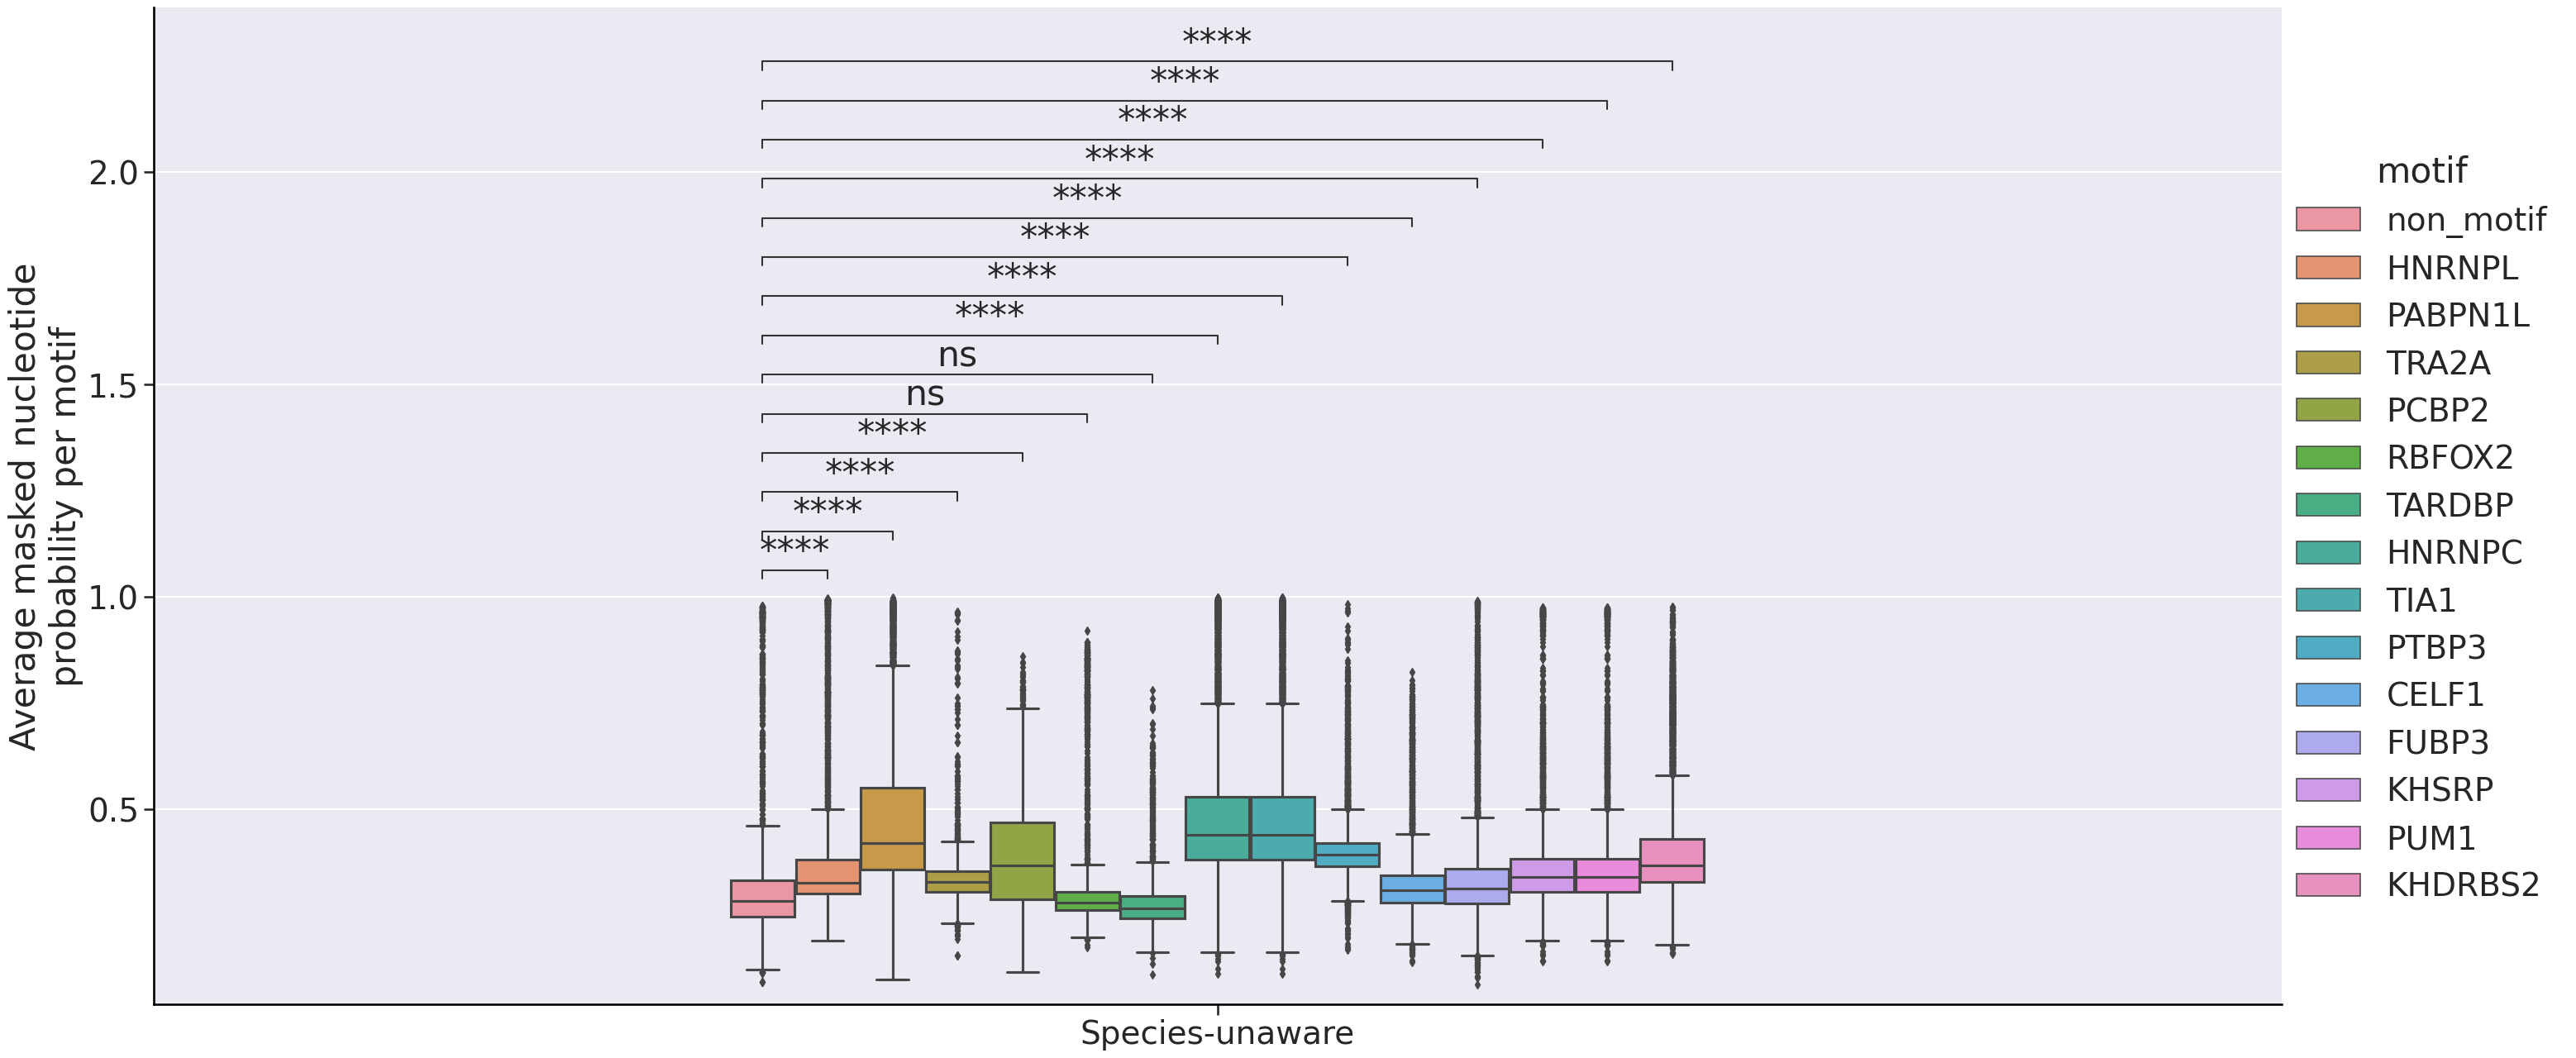

In [25]:
# plot
plt.clf()
plot_significance = True

#order = list(plot_df["motif"].unique())
order = ["Species-unaware"]

labels = order
mots = order

motifs = list(plot_df["motif"].unique())

mods = [("non_motif", motif) for motif in motifs]

mods_tmp = []
for m1, m2 in mods:
    if m1 != m2:
        mods_tmp.append((m1,m2))

mods = mods_tmp
    

g = sns.catplot(data=plot_df, x="Model", y="avg_target_probas", hue="motif",kind="box", height=14, aspect=2.0,
           order=order, estimator=np.mean)#, palette=custom_colors)

#plt.xticks(ticks = range(0,len(order)),labels=labels)
#plt.yticks(ticks=[0.2,0.4,0.6,0.8,1.0])

if plot_significance:
    #pairs=mods
    
    pairs = [(("Species-unaware", motif1), ("Species-unaware", motif2)) for motif1, motif2 in mods]
    # for m in mots:
    #     for mod in mods:
    #         pairs.append(((m,mod[0]),(m,mod[1])))
    for ax_n in g.axes:
        for ax in ax_n:
            # do I need to subset the data?
            annotator = Annotator(ax, pairs, data=plot_df, x="Model", y="avg_target_probas", hue="motif", order=order)
            annotator.configure(test='Mann-Whitney-ls', text_format='star', loc='inside', comparisons_correction="BH")
            annotator.apply_and_annotate()



plt.xlabel("")
plt.ylabel("Average masked nucleotide\nprobability per motif")
plt.show()